# Exploratory Data Analysis: Biomedical Text Classification

This notebook explores the cleaned biomedical abstracts dataset with extracted categories.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)

## 1. Load and Explore the Data

In [11]:
# Load the dataset with categories
df = pd.read_csv('preprocessing/abstracts_with_categories.csv')

print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
df.sample(15)

Dataset shape: (1000, 12)
Columns: ['PMID', 'Title', 'Abstract', 'Journal', 'Year', 'Authors', 'Cleaned_Abstract', 'Categories', 'Research_Type', 'Trial_Phase', 'Diseases', 'Chemicals']


,PMID,Title,Abstract,Journal,Year,Authors,Cleaned_Abstract,Categories,Research_Type,Trial_Phase,Diseases,Chemicals
232,40569933,Trends of long-term opioid therapy and subsequent discontinuation among people with chronic non-...,"To examine trends of opioid use, focusing on long-term opioid therapy (L-TOT) and its discontinu...",PloS one,2025.0,Qian Cai; Yun-Ting Huang; Thomas Allen; Charlotte Morris; Christos Grigoroglou; Evangelos Kontop...,examine trend opioid use focus long term opioid therapy l tot discontinuation people chronic non...,chronic non-cancer pain; 1.019; observational,observational,NaN,chronic non-cancer pain,1.019
627,40562371,Acute arterial ischemic stroke in children: single-center experience.,Arterial ischemic stroke (AIS) is an increasingly common disorder in childhood that causes sever...,Arquivos de neuro-psiquiatria,2025.0,Muharrem Bostancı; Arzu Ekici; Cengiz Havalı,arterial ischemic stroke ais increasingly common disorder childhood cause severe mortality morbi...,Arterial ischemic stroke; AIS; acute neurological complaints; seizure; paralysis; visual impairm...,review,NaN,Arterial ischemic stroke; AIS; acute neurological complaints; seizure; paralysis; visual impairm...,677C
674,40561244,Demographic Analysis of Populations Accessing an Overdose Response Training Created at a College...,To analyze and compare demographics of two distinct populations accessing an online opioid overd...,Rhode Island medical journal (2013),2025.0,Michaela Pacheco; Abiodun Ologunowa; Anita Jacobson,analyze compare demographic distinct population access online opioid overdose response training ...,overdose; overdose; overdose; overdose,NaN,NaN,overdose; overdose; overdose; overdose,NaN
454,40565278,The Complex Etiology of Epilepsy: Genetic Analysis and HLA Association in Patients in the Middle...,Epilepsy is one of the most common neurological disorders. Disease etiology and pathogenesis are...,International journal of molecular sciences,2025.0,Abeer Fadda; Mohamed Alsabbagh; Dhanya Vasudeva; Amira Saeed; Sara Aglan Tarek; Satanay Z Hubrac...,epilepsy common neurological disorder disease etiology pathogenesis understand genetic mutation ...,Epilepsy; neurological disorders; epilepsies; epilepsy; epilepsy; epilepsy; nucleotide; observat...,observational,NaN,Epilepsy; neurological disorders; epilepsies; epilepsy; epilepsy; epilepsy,nucleotide
654,40561635,The effect of eating disorders and trauma day treatment in women with eating disorders and child...,'Women with eating disorders (EDs) and a history of childhood maltreatment (CM) tend to have mor...,Child abuse & neglect,2025.0,Inbal Brenner; Lilac Lev-Ari; Rachel Bachner-Melman; Ilana Brand; Ady Blondheim; Shmuel Hirschma...,woman eat disorder ed history childhood maltreatment cm tend psychiatric comorbiditie include po...,eating disorders; CM; psychiatric; Stress Disorder; PTSD; PTSD; CPTSD; CM; comorbidity; CM; CM; ...,NaN,NaN,eating disorders; CM; psychiatric; Stress Disorder; PTSD; PTSD; CPTSD; CM; comorbidity; CM; CM; ...,NaN
469,40565132,Effects of Phenosanic Acid in Rat Seizure Models.,Oxidative stress and membrane damage are believed to be principally involved in the pathogenesis...,International journal of molecular sciences,2025.0,Victor A Aniol; Natalia A Lazareva; Yulia V Moiseeva; Olga A Nedogreeva; Margarita R Novikova; P...,oxidative stress membrane damage believe principally involve pathogenesis epilepsy study aim ass...,epilepsy; seizure; death; status epilepticus; pentylenetetrazole; lithium-pilocarpine; pentylene...,NaN,NaN,epilepsy; seizure; death; status epilepticus,pentylenetetrazole; lithium-pilocarpine; pentylenetetrazole; lithium-pilocarpine; corticosterone...
531,40563857,Acneiform Eruptions Caused by Lithium Treatment May Be Related to <i>Demodex</i> Mites (Prostigm...,Acneiform eruptions are a common adverse effect of lithium treatment that may impact adherence. ...,Biology,2025.0,Rif S El-Mallakh; Masoud Doroodgar; Mehak Pahwa; Omar H A Elsaye

In [3]:
# Basic info about the dataset
print("Dataset Info:")
print(f"Total abstracts: {len(df)}")
print(f"Abstracts with categories: {df['Categories'].notna().sum()}")
print(f"Abstracts with research types: {df['Research_Type'].notna().sum()}")
print(f"Abstracts with trial phases: {df['Trial_Phase'].notna().sum()}")

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

Dataset Info:
Total abstracts: 1000
Abstracts with categories: 987
Abstracts with research types: 438
Abstracts with trial phases: 4

Missing values:
PMID                  0
Title                 0
Abstract              0
Journal               0
Year                  5
Authors               0
Cleaned_Abstract      0
Categories           13
Research_Type       562
Trial_Phase         996
Diseases             31
Chemicals           445
dtype: int64


## 2. Text Analysis

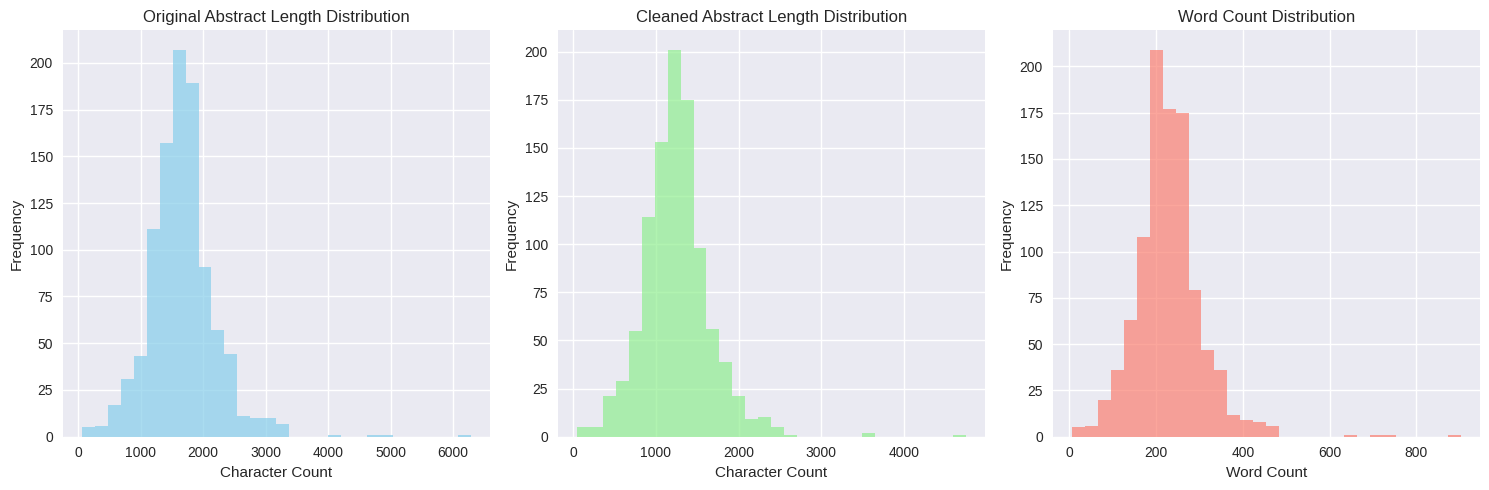


Text Statistics:
Average abstract length: 1663 characters
Average word count: 229 words
Average cleaned length: 1249 characters


In [4]:
# Analyze text lengths
df['Abstract_Length'] = df['Abstract'].str.len()
df['Cleaned_Abstract_Length'] = df['Cleaned_Abstract'].str.len()
df['Word_Count'] = df['Abstract'].str.split().str.len()

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Original abstract length distribution
axes[0].hist(df['Abstract_Length'], bins=30, alpha=0.7, color='skyblue')
axes[0].set_title('Original Abstract Length Distribution')
axes[0].set_xlabel('Character Count')
axes[0].set_ylabel('Frequency')

# Cleaned abstract length distribution
axes[1].hist(df['Cleaned_Abstract_Length'], bins=30, alpha=0.7, color='lightgreen')
axes[1].set_title('Cleaned Abstract Length Distribution')
axes[1].set_xlabel('Character Count')
axes[1].set_ylabel('Frequency')

# Word count distribution
axes[2].hist(df['Word_Count'], bins=30, alpha=0.7, color='salmon')
axes[2].set_title('Word Count Distribution')
axes[2].set_xlabel('Word Count')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

print(f"\nText Statistics:")
print(f"Average abstract length: {df['Abstract_Length'].mean():.0f} characters")
print(f"Average word count: {df['Word_Count'].mean():.0f} words")
print(f"Average cleaned length: {df['Cleaned_Abstract_Length'].mean():.0f} characters")

## 3. Category Analysis

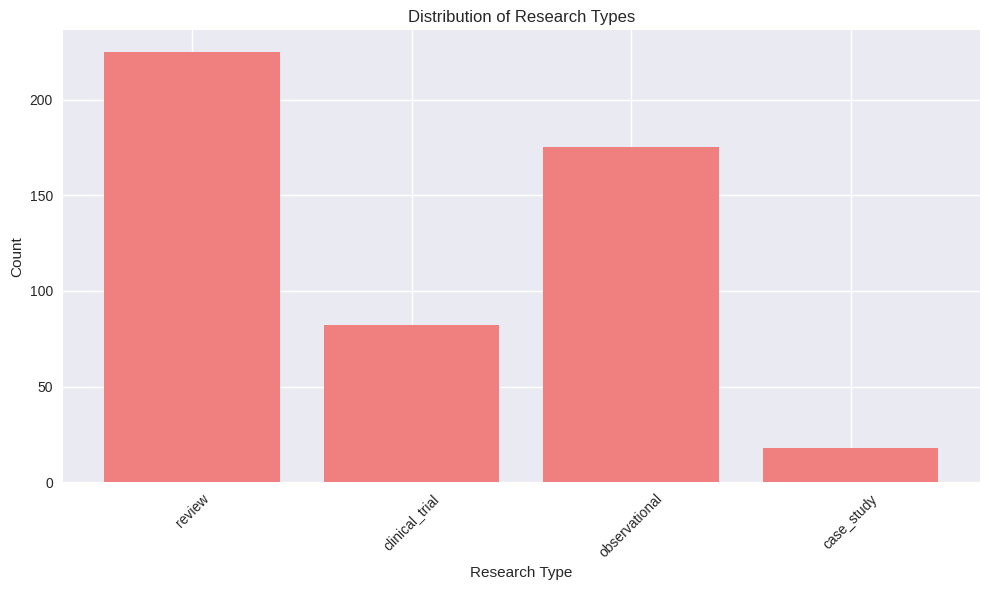


Research Type Distribution:
review: 225
observational: 175
clinical_trial: 82
case_study: 18


In [5]:
# Analyze research types
research_types = []
for types in df['Research_Type'].dropna():
    research_types.extend(types.split('; '))

research_counts = Counter(research_types)

plt.figure(figsize=(10, 6))
plt.bar(research_counts.keys(), research_counts.values(), color='lightcoral')
plt.title('Distribution of Research Types')
plt.xlabel('Research Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f"\nResearch Type Distribution:")
for research_type, count in research_counts.most_common():
    print(f"{research_type}: {count}")

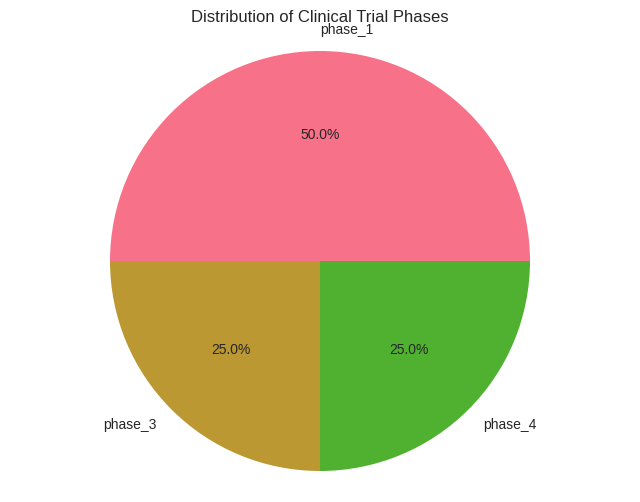


Trial Phase Distribution:
phase_1: 2
phase_3: 1
phase_4: 1


In [6]:
# Analyze trial phases
trial_phases = []
for phases in df['Trial_Phase'].dropna():
    trial_phases.extend(phases.split('; '))

phase_counts = Counter(trial_phases)

if phase_counts:
    plt.figure(figsize=(8, 6))
    plt.pie(phase_counts.values(), labels=phase_counts.keys(), autopct='%1.1f%%')
    plt.title('Distribution of Clinical Trial Phases')
    plt.axis('equal')
    plt.show()
    
    print(f"\nTrial Phase Distribution:")
    for phase, count in phase_counts.most_common():
        print(f"{phase}: {count}")
else:
    print("No trial phases found in the dataset.")

## 4. Disease and Treatment Analysis

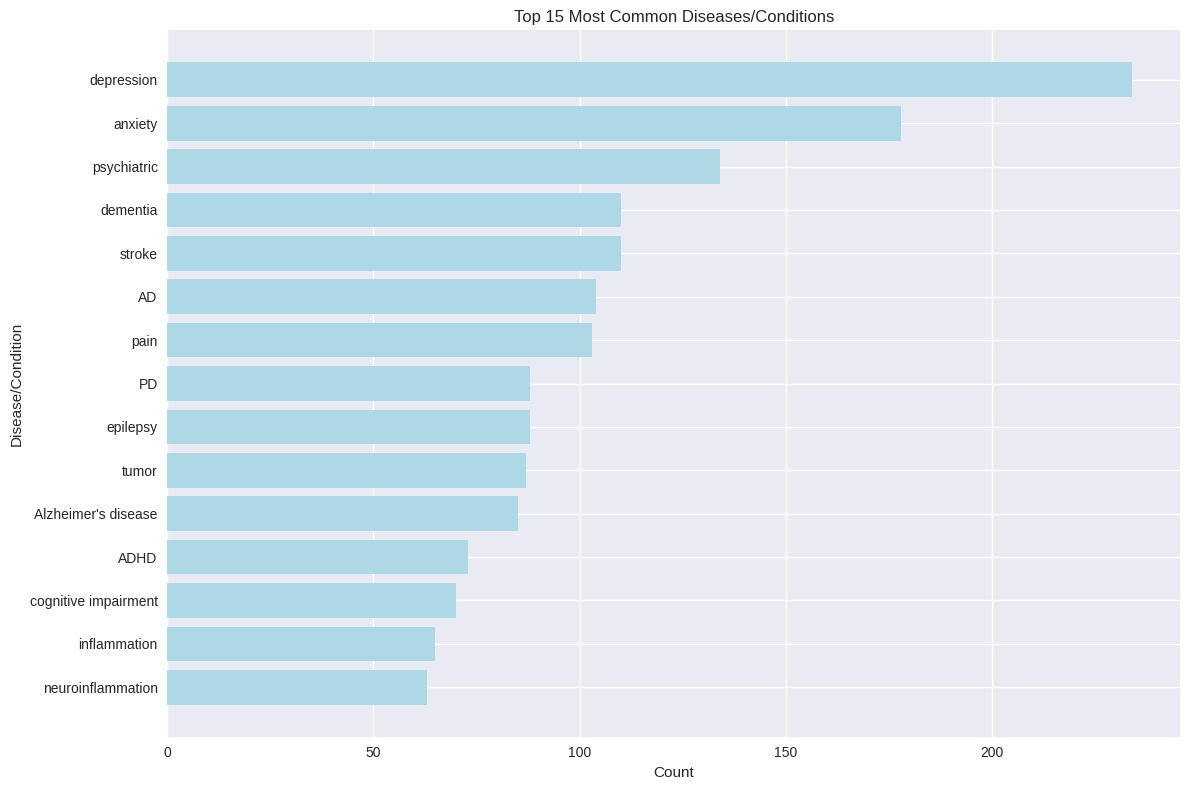


Top 10 Diseases/Conditions:
depression: 234
anxiety: 178
psychiatric: 134
dementia: 110
stroke: 110
AD: 104
pain: 103
PD: 88
epilepsy: 88
tumor: 87


In [7]:
# Analyze diseases
diseases = []
for disease_list in df['Diseases'].dropna():
    diseases.extend(disease_list.split('; '))

disease_counts = Counter(diseases)

# Show top 15 diseases
top_diseases = dict(disease_counts.most_common(15))

plt.figure(figsize=(12, 8))
plt.barh(list(top_diseases.keys()), list(top_diseases.values()), color='lightblue')
plt.title('Top 15 Most Common Diseases/Conditions')
plt.xlabel('Count')
plt.ylabel('Disease/Condition')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print(f"\nTop 10 Diseases/Conditions:")
for disease, count in disease_counts.most_common(10):
    print(f"{disease}: {count}")

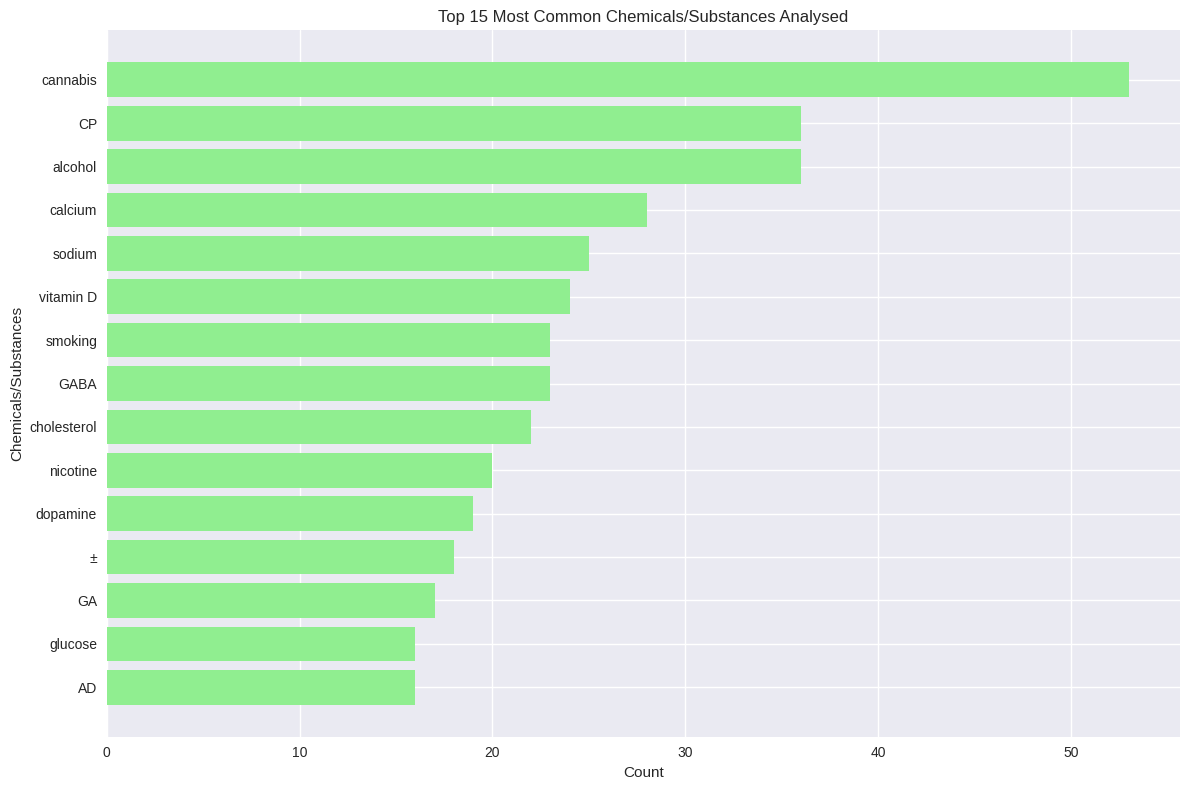


Top 10 Chemicals/Substances:
cannabis: 53
CP: 36
alcohol: 36
calcium: 28
sodium: 25
vitamin D: 24
smoking: 23
GABA: 23
cholesterol: 22
nicotine: 20


In [10]:
# Analyze chemicals
chemicals = []
for chemical_list in df['Chemicals'].dropna():
    chemicals.extend(chemical_list.split('; '))

chemical_counts = Counter(chemicals)

# Show top 15 treatments
top_chemicals = dict(chemical_counts.most_common(15))

plt.figure(figsize=(12, 8))
plt.barh(list(top_chemicals.keys()), list(top_chemicals.values()), color='lightgreen')
plt.title('Top 15 Most Common Chemicals/Substances Analysed')
plt.xlabel('Count')
plt.ylabel('Chemicals/Substances')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print(f"\nTop 10 Chemicals/Substances:")
for chemical, count in chemical_counts.most_common(10):
    print(f"{chemical}: {count}")

## 5. Year Analysis

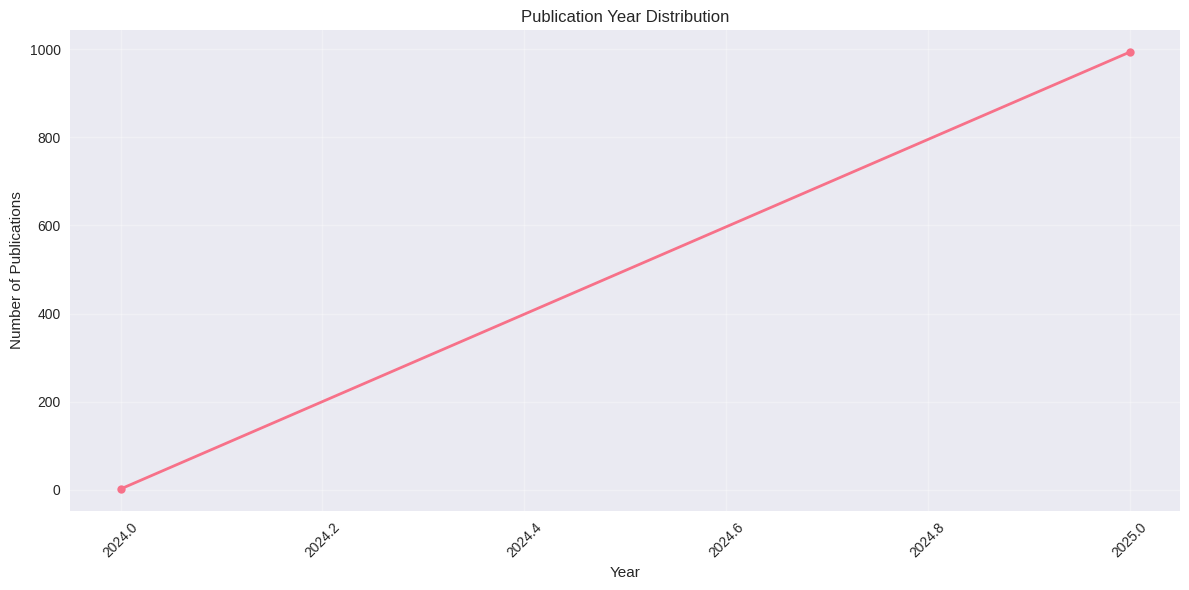


Year Range: 2024.0 - 2025.0
Most recent year: 2025.0 (993 publications)
Oldest year: 2024.0 (2 publications)


In [11]:
# Analyze publication years
year_counts = df['Year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(year_counts.index, year_counts.values, marker='o', linewidth=2, markersize=6)
plt.title('Publication Year Distribution')
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nYear Range: {year_counts.index.min()} - {year_counts.index.max()}")
print(f"Most recent year: {year_counts.index.max()} ({year_counts.iloc[-1]} publications)")
print(f"Oldest year: {year_counts.index.min()} ({year_counts.iloc[0]} publications)")

## 6. Journal Analysis

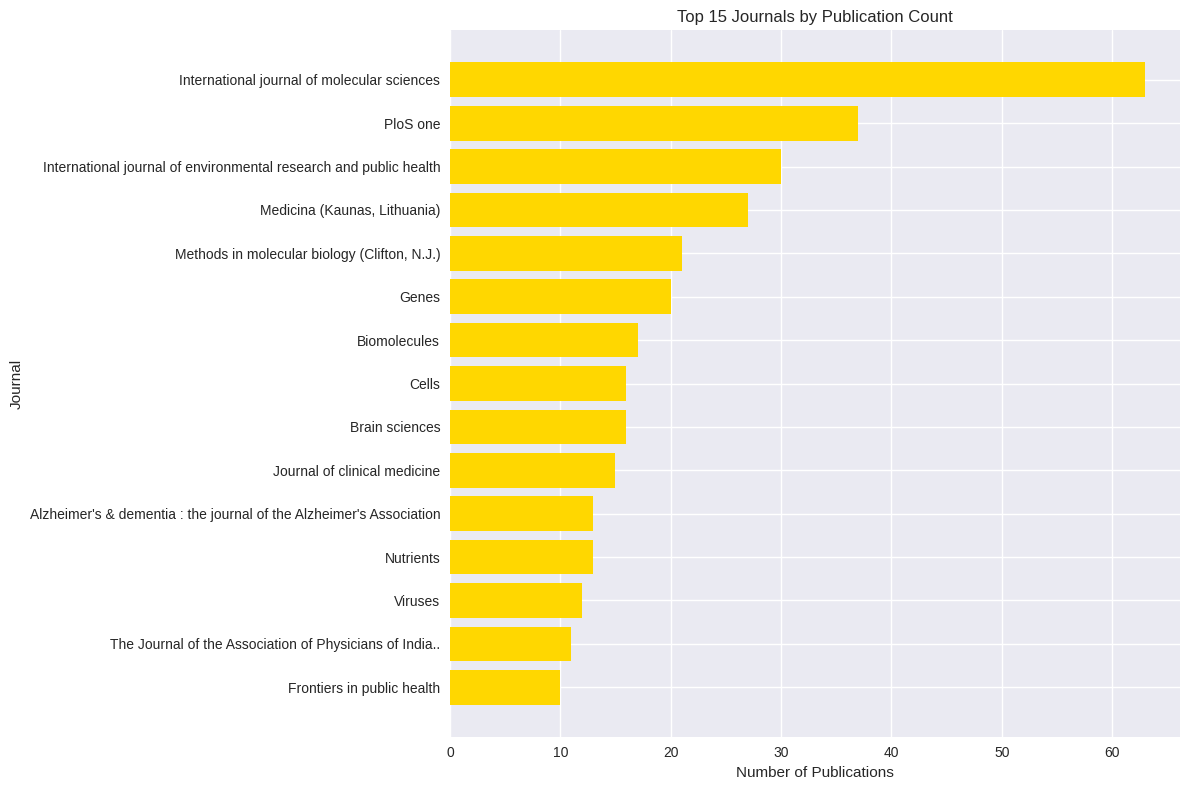


Top 10 Journals:
International journal of molecular sciences: 63
PloS one: 37
International journal of environmental research and public health: 30
Medicina (Kaunas, Lithuania): 27
Methods in molecular biology (Clifton, N.J.): 21
Genes: 20
Biomolecules: 17
Cells: 16
Brain sciences: 16
Journal of clinical medicine: 15


In [12]:
# Analyze top journals
journal_counts = df['Journal'].value_counts().head(15)

plt.figure(figsize=(12, 8))
plt.barh(range(len(journal_counts)), journal_counts.values, color='gold')
plt.yticks(range(len(journal_counts)), journal_counts.index)
plt.title('Top 15 Journals by Publication Count')
plt.xlabel('Number of Publications')
plt.ylabel('Journal')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print(f"\nTop 10 Journals:")
for journal, count in journal_counts.head(10).items():
    print(f"{journal}: {count}")

## 7. Summary and Insights

In [13]:
print("=== DATASET SUMMARY ===")
print(f"Total abstracts: {len(df)}")
print(f"Unique journals: {df['Journal'].nunique()}")
print(f"Year range: {df['Year'].min()} - {df['Year'].max()}")
print(f"Abstracts with categories: {df['Categories'].notna().sum()} ({df['Categories'].notna().sum()/len(df)*100:.1f}%)")
print(f"Abstracts with research types: {df['Research_Type'].notna().sum()} ({df['Research_Type'].notna().sum()/len(df)*100:.1f}%)")
print(f"Abstracts with trial phases: {df['Trial_Phase'].notna().sum()} ({df['Trial_Phase'].notna().sum()/len(df)*100:.1f}%)")

print("\n=== KEY INSIGHTS ===")
print(f"• Average abstract length: {df['Abstract_Length'].mean():.0f} characters")
print(f"• Most common research type: {research_counts.most_common(1)[0][0] if research_counts else 'None'}")
print(f"• Most common disease: {disease_counts.most_common(1)[0][0] if disease_counts else 'None'}")
print(f"• Most common treatment: {treatment_counts.most_common(1)[0][0] if treatment_counts else 'None'}")
print(f"• Most active journal: {journal_counts.index[0] if len(journal_counts) > 0 else 'None'}")

=== DATASET SUMMARY ===
Total abstracts: 1000
Unique journals: 408
Year range: 2024.0 - 2025.0
Abstracts with categories: 466 (46.6%)
Abstracts with research types: 466 (46.6%)
Abstracts with trial phases: 6 (0.6%)

=== KEY INSIGHTS ===
• Average abstract length: 1663 characters
• Most common research type: review
• Most common disease: None
• Most common treatment: None
• Most active journal: International journal of molecular sciences
